<a href="https://colab.research.google.com/github/jsansao/idl/blob/main/Licao31_VGGFACE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Lição 31 - Reconhecimento Facial com VGGFACE2




## Instalação

O pacote original tem uma incompatibilidade com o Keras na versão mais recente, por isso foi feito um fork.

Deve-se instalar também o mtcnn para detecção da face e o keras_applications.

In [1]:
!pip install git+https://github.com/pleshro/keras-vggface.git
!pip install mtcnn
!pip install keras_applications

  Cloning https://github.com/pleshro/keras-vggface.git to /tmp/pip-req-build-qoiz04c8
  Running command git clone --filter=blob:none --quiet https://github.com/pleshro/keras-vggface.git /tmp/pip-req-build-qoiz04c8
  Resolved https://github.com/pleshro/keras-vggface.git to commit 85e5017fa0f0f67bff8d1976460e620abe76e734
  Preparing metadata (setup.py) ... done
  Created wheel for keras-vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8338 sha256=025f8b28eee8a35c0619fb0150a44bfd877d3b57117b253e73f157f028da45ec
  Stored in directory: /tmp/pip-ephem-wheel-cache-keq2f8ii/wheels/6e/43/54/51f3f3e2c0b0d7465db8f642a2cfdf8a861507bcf5c5d520b2
Successfully built keras-vggface
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.8 MB/s eta 0:00:00


In [2]:
!pip show keras-vggface

Name: keras-vggface
Version: 0.6
Summary: VGGFace implementation with Keras framework
Home-page: https://github.com/rcmalli/keras-vggface
Author: Refik Can MALLI
Author-email: mallir@itu.edu.tr
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: h5py, keras, numpy, pillow, pyyaml, scipy, six
Required-by: 


In [3]:
from numpy import expand_dims
from matplotlib import pyplot
from PIL import Image
import numpy as np
from numpy import asarray


import mtcnn
#from keras.utils import get_source_inputs

from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions


## Inferência no conjunto pré-treinado com o dataset VGGFACE-2

In [4]:
model = VGGFace(model='resnet50')
# summarize input and output shape
print('Inputs: %s' % model.inputs)
print('Outputs: %s' % model.outputs)

165439116/165439116 [==============================] - 1s 0us/step
Inputs: [<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>]
Outputs: [<KerasTensor: shape=(None, 8631) dtype=float32 (created by layer 'classifier')>]


In [5]:
def extract_face(filename, required_size=(224, 224)):
	# load image from file
	pixels = pyplot.imread(filename)
	# create the detector, using default weights
	detector = mtcnn.MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

## Inferência de um arquivo

In [26]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving Robocop-Returns-Cast-Peter-Weller-Murphy-696x366.jpg to Robocop-Returns-Cast-Peter-Weller-Murphy-696x366.jpg
User uploaded file "Robocop-Returns-Cast-Peter-Weller-Murphy-696x366.jpg" with length 39658 bytes


1/1 [==============================] - 0s 216ms/step


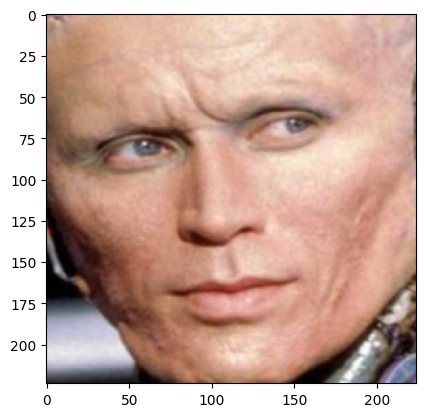

1/1 [==============================] - 1s 770ms/step
b' Peter_Weller': 97.081%
b' Billy_Idol': 1.356%
b' Ulrich_Tukur': 0.318%
b' David_Moyes': 0.245%
b' Oscar_Hiljemark': 0.089%


In [27]:
# load the photo and extract the face
pixels = extract_face(fn)
# plot the extracted face
pyplot.imshow(pixels)
# show the plot
pyplot.show()
# convert one face into samples
pixels = pixels.astype('float32')
samples = expand_dims(pixels, axis=0)
# prepare the face for the model, e.g. center pixels
samples = preprocess_input(samples, version=2)
# create a vggface model
model = VGGFace(model='resnet50')
# perform prediction
yhat = model.predict(samples)
# convert prediction into names
results = decode_predictions(yhat)
# display most likely results
for result in results[0]:
	print('%s: %.3f%%' % (result[0], result[1]*100))

## Verificação facial com VGGFace2


In [28]:
model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')

In [29]:
# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
	# load image from file
	pixels = pyplot.imread(filename)
	# create the detector, using default weights
	detector = mtcnn.MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array


In [30]:
# extract faces and calculate face embeddings for a list of photo files
def get_embeddings(filenames):
	# extract faces
	faces = [extract_face(f) for f in filenames]
	# convert into an array of samples
	samples = asarray(faces, 'float32')
	# prepare the face for the model, e.g. center pixels
	samples = preprocess_input(samples, version=2)
	# create a vggface model
	model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')
	# perform prediction
	yhat = model.predict(samples)
	return yhat

In [31]:
from scipy.spatial.distance import cosine
# determine if a candidate face is a match for a known face
def is_match(known_embedding, candidate_embedding, thresh=0.5):
	# calculate distance between embeddings
	score = cosine(known_embedding, candidate_embedding)
	if score <= thresh:
		print('>face is a Match (%.3f <= %.3f)' % (score, thresh))
	else:
		print('>face is NOT a Match (%.3f > %.3f)' % (score, thresh))

In [32]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Robocop-Returns-Cast-Peter-Weller-Murphy-696x366.jpg to Robocop-Returns-Cast-Peter-Weller-Murphy-696x366 (1).jpg
Saving 4.clint_eastwood_j._edgar_premier%2c_november_2011_%28cropped%29.jpg to 4.clint_eastwood_j._edgar_premier%2c_november_2011_%28cropped%29 (2).jpg
Saving 2.cry-macho.jpg to 2.cry-macho (1).jpg
User uploaded file "Robocop-Returns-Cast-Peter-Weller-Murphy-696x366 (1).jpg" with length 39658 bytes
User uploaded file "4.clint_eastwood_j._edgar_premier%2c_november_2011_%28cropped%29 (2).jpg" with length 508834 bytes
User uploaded file "2.cry-macho (1).jpg" with length 78532 bytes


In [33]:
embeddings = get_embeddings(uploaded)

1/1 [==============================] - 1s 1s/step


In [34]:
print(embeddings)

[[0.0000000e+00 6.0854769e-01 3.6548932e+00 ... 3.6273696e+00
  5.4859865e-01 9.5518269e-03]
 [0.0000000e+00 5.2353239e+00 4.8812985e-02 ... 1.0457309e+01
  0.0000000e+00 7.8736395e-01]
 [2.2924998e-01 2.4684606e+00 9.6894836e-01 ... 5.8131003e+00
  0.0000000e+00 0.0000000e+00]]


In [35]:
is_match(embeddings[0], embeddings[1])

>face is NOT a Match (0.553 > 0.500)


In [36]:
is_match(embeddings[0], embeddings[2])

>face is NOT a Match (0.588 > 0.500)


In [37]:
is_match(embeddings[1], embeddings[2])

>face is a Match (0.430 <= 0.500)


In [38]:
embeddings.shape

(3, 2048)